In [1]:
!pip install polars

In [2]:
import polars as pl
from datetime import datetime
import pandas as pd
import numpy as np

In [3]:
user_filtered_course_df = pl.read_parquet("/kaggle/input/user-video-filtered-course/user_filtered_course.parquet")
user_filtered_course_df.head()

id,name,gender,school,year_of_birth,course_order,enroll_time,filtered_course_order,filtered_enroll_time
str,str,i64,str,i64,list[i64],list[str],list[i64],list[str]
"""U_24""","""王帅国""",1,"""清华大学""",6558,"[597214, 605512, … 2229905]","[""2019-11-01 16:27:10"", ""2019-12-12 18:21:18"", … ""2020-11-21 11:38:57""]","[758201, 735214, … 2229905]","[""2019-11-01 16:27:10"", ""2019-12-12 18:21:18"", … ""2020-11-21 11:38:57""]"
"""U_25""","""王帅国""",0,"""清华大学""",null,[1903985],"[""2020-08-07 18:59:13""]",[1903985],"[""2020-08-07 18:59:13""]"
"""U_53""","""于歆杰""",1,"""清华大学""",1973,"[696679, 1704639, … 1794464]","[""2020-04-30 16:39:11""]",[1771179],"[""2020-04-30 16:39:11""]"
"""U_54""","""马昱春""",2,"""清华大学""",null,"[682442, 682164, … 1906706]","[""2020-04-15 09:12:56"", ""2020-06-13 15:14:52""]","[1748240, 697791]","[""2020-04-15 09:12:56"", ""2020-06-13 15:14:52""]"
"""U_68""","""秋""",2,"""清华大学""",null,"[696692, 948431]","[""2020-01-21 10:18:02""]",[948431],"[""2020-01-21 10:18:02""]"


In [4]:
uv_filtered_course_df = pl.read_parquet("/kaggle/input/user-video-filtered-course/uv_filtered_course.parquet")
uv_filtered_course_df[:2, :]

seq,user_id,filtered_seq,user_videos_id,ccid,duration_seg,avg_duration_seg,segments_list,start_points,end_points,seg_intervals,num_seg_repeat,num_move_seg,speed,watch_time_seg,watch_time,video_length,perc_miss,p_seg,ent_seg,user_video_ccids,course_of_watched_video,enroll_time
list[struct[2]],str,list[struct[2]],list[str],list[str],list[list[f64]],list[f64],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[i32],list[i32],list[list[f64]],list[list[f64]],list[f64],list[f64],list[f64],list[list[f64]],list[list[f64]],list[str],list[str],list[str]
"[{""V_1358540"",[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}]}, {""V_1358542"",[{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}]}, … {""V_1358771"",[{38.9,61.5,1.5,1587480094}]}]","""U_197""","[{""V_1358540"",[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}]}, {""V_1358542"",[{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}]}, … {""V_1358782"",[{350.2,395.3,1.5,1587530324}, {492.6,95.4,1.5,1587530419}]}]","[""V_1358540"", ""V_1358542"", … ""V_1358782""]","[""30BB198AD98E3C0E9C33DC5901307461"", ""E62F36210A8CAD489C33DC5901307461"", … ""C21C82D66075DBD69C33DC5901307461""]","[[5.0, 5.0, … 5.0], [5.0, 5.0, … 5.0], … [45.1, 397.2]]","[4.915625, 5.8785, … 221.15]","[[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}], [{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}], … [{350.2,395.3,1.5,1587530324}, {492.6,95.4,1.5,1587530419}]]","[[59.747, 69.795, … 584.751], [124.588, 194.608, … 579.763], … [350.2, 492.6]]","[[64.747, 74.795, … 589.751], [129.588, 199.608, … 584.763], … [395.3, 95.4]]","[[0.0, 5.048, … 34.639], [0.0, 65.02, … 20.102], … [0.0, 97.3]]","[1, 0, … 0]","[6, 5, … 1]","[[1.0, 1.0, … 1.0], [1.0, 1.0, … 1.0], … [1.5, 1.5]]","[[5.0, 5.0, … 5.0], [5.0, 5.0, … 5.0], … [30.066667, 264.8]]","[39.325, 35.271, … 294.866667]","[593.84, 587.48, … 527.64]","[93.377846, 93.996221, … 44.115938]","[[0.127146, 0.127146, … 0.127146], [0.14176, 0.14176, … 0.14176], … [0.101967, 0.898033]]","[[0.378315, 0.378315, … 0.378315], [0.399547, 0.399547, … 0.399547], … [0.335862, 0.139338]]","[""30BB198AD98E3C0E9C33DC5901307461"", ""E62F36210A8CAD489C33DC5901307461"", … ""C21C82D66075DBD69C33DC5901307461""]","[""697791"", ""697791"", … ""697791""]","[""2019-12-16 18:02:52"", ""2019-12-16 18:02:52"", … ""2019-12-16 18:02:52""]"
"[{""V_1358540"",[{4.501,598.978027,1.0,1582990570}, {4.75,19.75,1.0,1582991256}]}, {""V_1358542"",[{4.501,204.501,1.0,1582991286}, {209.502,374.501,1.0,1582991491}, {384.501,591.916992,1.0,1582991666}]}, … {""V_1358584"",[{4.251,405.42099,1.0,1583483786}]}]","""U_514""","[{""V_1358540"",[{4.501,598.978027,1.0,1582990570}, {4.75,19.75,1.0,1582991256}]}, {""V_1358542"",[{4.501,204.501,1.0,1582991286}, {209.502,374.501,1.0,1582991491}, {384.501,591.916992,1.0,1582991666}]}, … {""V_1358637"",[{4.001,9.001,1.0,1586081587}, {59.751,64.751,1.0,1586081796}]}]","[""V_1358540"", ""V_1358542"", … ""V_1358637""]","[""30BB198AD98E3C0E9C33DC5901307461"", ""E62F36210A8CAD489C33DC5901307461"", … ""BC20A1D29F5417AA9C33DC5901307461""]","[[594.477027, 15.0], [200.0, 164.999, 207.415992], … [5.0, 5.0]]","[304.738514, 190.804997, … 5.0]","[[{4.501,598.978027,1.0,1582990570}, {4.75,19.75,1.0,1582991256}], [{4.501,204.501,1.0,1582991286}, {209.502,374.501,1.0,1582991491}, {384.501,591.916992,1.0,1582991666}], … [{4.001,9.001,1.0,1586081587}, {59.751,64.751,1.0,1586081796}]]","[[4.501, 4.75], [4.501, 209.502, 384.501], … [4.001, 59.751]]","[[598.978027, 19.75], [204.501, 374.501, 591.916992], … [9.001, 64.751]]","[[0.0, 594.228027], [0.0, 5.001, 10.0], … [0.0, 50.75]]","[1, 0, … 0]","[0, 2, … 1]","[[1.0, 1.0], [1.0, 1.0, 1.0], … [1.0, 1.0]]","[[594.477027, 15.0], [200.0,

In [5]:
course_info_limit = pl.read_parquet("/kaggle/input/user-video-filtered-course/course_info_limit.parquet")
course_info_limit[:2, :]

course_id,name,field_x,num_field_x,prerequisites,num_prerequisites,about,count_course_id,resource,video_ids,ccids,clean_course_id
str,str,str,i64,str,i64,str,i64,list[struct[3]],list[str],list[str],str
"""C_674968""","""巴蜀文化""","""['中国语言文学', '民族学']""",2,"""[]""",0,"""巴蜀文化是中华文明绽放于西南大地的灿烂之花。本课程将从考古、…",183,"[{[""第一章:导论 —— 巴蜀文化的悠久历程与风格特色"", ""1.1:巴蜀文化的定义和时空范围"", ""1.1巴蜀文化的定义和时空范围""],""V_2175267"",""1.1.1""}, {[""第一章:导论 —— 巴蜀文化的悠久历程与风格特色"", ""1.2:巴蜀历史文化的辉煌历程"", ""1.2巴蜀历史文化的辉煌历程""],""V_2175268"",""1.2.1""}, … {[""第十二章 近代篇：四川保路风潮与中国制度文化现代转型"", null, ""第十二章测试""],""Ex_2175357"",""12.5""}]","[""V_2175267"", ""V_2175268"", … ""V_2175356""]","[""50A52A74EE3C59CB9C33DC5901307461"", ""2CAE2614B280B27F9C33DC5901307461"", … ""9D842C07B4A837C79C33DC5901307461""]","""674968"""
"""C_674971""","""宝玉石鉴赏""","""[]""",0,"""[]""",0,"""【国家精品课】宝玉石，既是自然美的精华，也是财富身份的象征。…",23573,"[{[""第一讲 序言"", ""1.1 宝玉石的基本概念、属性和种类"", ""Video_1.1宝玉石的基本概念、属性和种类""],""V_1642206"",""1.1.1""}, {[""第一讲 序言"", ""1.2 宝玉石的分类及其主要宝石"", ""Video_1.2宝玉石的分类及其主要宝石""],""V_1642207"",""1.3.1""}, … {[""第四十五~四十七讲"", null, ""习题45.1-47.1""],""Ex_1642337"",""29.4""}]","[""V_1642206"", ""V_1642207"", … ""V_1642336""]","[""B05669E3A0137E7D9C33DC5901307461"", ""CE7BB2707A1EE0339C33DC5901307461"", … ""9F5C7516CD0E609A9C33DC5901307461""]","""674971"""


In [6]:
uv_filtered_course_df = uv_filtered_course_df.drop('seq')

In [7]:
# TẠO CỘT LOCAL_START_TIME
uv_filtered_course_df = uv_filtered_course_df.with_columns(
    pl.col("segments_list").list.eval(  # Xử lý list ngoài
        pl.element().list.eval(         # Xử lý list bên trong
            pl.element().struct.field("local_start_time").cast(pl.Int64)
        )
    ).alias("local_start_time")
)

# Chuyển sang datetime format
uv_filtered_course_df = uv_filtered_course_df.with_columns(
    pl.col("local_start_time").list.eval(
        pl.element().list.eval(  # Xử lý list con
            pl.from_epoch(pl.element()).dt.strftime("%Y-%m-%d %H:%M:%S")
        )
    )
)

uv_filtered_course_df[:2, :]

user_id,filtered_seq,user_videos_id,ccid,duration_seg,avg_duration_seg,segments_list,start_points,end_points,seg_intervals,num_seg_repeat,num_move_seg,speed,watch_time_seg,watch_time,video_length,perc_miss,p_seg,ent_seg,user_video_ccids,course_of_watched_video,enroll_time,local_start_time
str,list[struct[2]],list[str],list[str],list[list[f64]],list[f64],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[i32],list[i32],list[list[f64]],list[list[f64]],list[f64],list[f64],list[f64],list[list[f64]],list[list[f64]],list[str],list[str],list[str],list[list[str]]
"""U_197""","[{""V_1358540"",[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}]}, {""V_1358542"",[{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}]}, … {""V_1358782"",[{350.2,395.3,1.5,1587530324}, {492.6,95.4,1.5,1587530419}]}]","[""V_1358540"", ""V_1358542"", … ""V_1358782""]","[""30BB198AD98E3C0E9C33DC5901307461"", ""E62F36210A8CAD489C33DC5901307461"", … ""C21C82D66075DBD69C33DC5901307461""]","[[5.0, 5.0, … 5.0], [5.0, 5.0, … 5.0], … [45.1, 397.2]]","[4.915625, 5.8785, … 221.15]","[[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}], [{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}], … [{350.2,395.3,1.5,1587530324}, {492.6,95.4,1.5,1587530419}]]","[[59.747, 69.795, … 584.751], [124.588, 194.608, … 579.763], … [350.2, 492.6]]","[[64.747, 74.795, … 589.751], [129.588, 199.608, … 584.763], … [395.3, 95.4]]","[[0.0, 5.048, … 34.639], [0.0, 65.02, … 20.102], … [0.0, 97.3]]","[1, 0, … 0]","[6, 5, … 1]","[[1.0, 1.0, … 1.0], [1.0, 1.0, … 1.0], … [1.5, 1.5]]","[[5.0, 5.0, … 5.0], [5.0, 5.0, … 5.0], … [30.066667, 264.8]]","[39.325, 35.271, … 294.866667]","[593.84, 587.48, … 527.64]","[93.377846, 93.996221, … 44.115938]","[[0.127146, 0.127146, … 0.127146], [0.14176, 0.14176, … 0.14176], … [0.101967, 0.898033]]","[[0.378315, 0.378315, … 0.378315], [0.399547, 0.399547, … 0.399547], … [0.335862, 0.139338]]","[""30BB198AD98E3C0E9C33DC5901307461"", ""E62F36210A8CAD489C33DC5901307461"", … ""C21C82D66075DBD69C33DC5901307461""]","[""697791"", ""697791"", … ""697791""]","[""2019-12-16 18:02:52"", ""2019-12-16 18:02:52"", … ""2019-12-16 18:02:52""]","[[""2020-02-20 07:36:14"", ""2020-02-20 07:36:24"", … ""2020-02-20 08:10:12""], [""2020-02-20 08:14:15"", ""2020-02-20 08:15:25"", … ""2020-02-20 08:21:50""], … [""2020-04-22 04:38:44"", ""2020-04-22 04:40:19""]]"
"""U_514""","[{""V_1358540"",[{4.501,598.978027,1.0,1582990570}, {4.75,19.75,1.0,1582991256}]}, {""V_1358542"",[{4.501,204.501,1.0,1582991286}, {209.502,374.501,1.0,1582991491}, {384.501,591.916992,1.0,1582991666}]}, … {""V_1358637"",[{4.001,9.001,1.0,1586081587}, {59.751,64.751,1.0,1586081796}]}]","[""V_1358540"", ""V_1358542"", … ""V_1358637""]","[""30BB198AD98E3C0E9C33DC5901307461"", ""E62F36210A8CAD489C33DC5901307461"", … ""BC20A1D29F5417AA9C33DC5901307461""]","[[594.477027, 15.0], [200.0, 164.999, 207.415992], … [5.0, 5.0]]","[304.738514, 190.804997, … 5.0]","[[{4.501,598.978027,1.0,1582990570}, {4.75,19.75,1.0,1582991256}], [{4.501,204.501,1.0,1582991286}, {209.502,374.501,1.0,1582991491}, {384.501,591.916992,1.0,1582991666}], … [{4.001,9.001,1.0,1586081587}, {59.751,64.751,1.0,1586081796}]]","[[4.501, 4.75], [4.501, 209.502, 384.501], … [4.001, 59.751]]","[[598.978027, 19.75], [204.501, 374.501, 591.916992], … [9.001, 64.751]]","[[0.0, 594.228027], [0.0, 5.001, 10.0], … [0.0, 50.75]]","[1, 0, … 0]","[0, 2, … 1]","[[1.0, 1.0], [1.0, 1.0, 1.0], … [1.0, 1.0]]","[[594.477027, 15.0], [200.0, 164.999, 207.415992], … [5.0, 5.0]]","[609.477027, 572.414992, … 10.0]","[593.84, 587.48, … 142.8]","[-2.633205, 2.564344, … 92.997199]","[[0.975389, 0.024611], [0.349397, 0.288251, 0.362352], … [0.5, 0.5]]","[[0.035066, 0.131536], [0.530057, 0.517296, 0.530678], … [0.5, 0.5]]","[""30BB198AD98E3C0E9C33DC5901307461"", ""E

In [8]:
# KIỂM TRA VIỆC XEM CÁC SEGMENT CỦA 1 VIDEO CÓ CHÊNH NHAU QUÁ 1 NGÀY KHÔNG
def check_gap_exceeds_one_day(row):
    for session in row:  # mỗi session là 1 mảng thời gian xem video
        if len(session) < 2:
            continue
        times = [datetime.strptime(t, "%Y-%m-%d %H:%M:%S") for t in session]
        times.sort()  # sắp xếp cho chắc ăn
        for i in range(1, len(times)):
            if (times[i] - times[i - 1]).days > 0:
                return True  # có cách nhau quá 1 ngày
    return False  # không vi phạm


In [9]:
cols_to_explode = [col for col in uv_filtered_course_df.columns if col != "user_id"]
df_exploded = uv_filtered_course_df.explode(cols_to_explode)

In [11]:
df_exploded.head()

user_id,filtered_seq,user_videos_id,ccid,duration_seg,avg_duration_seg,segments_list,start_points,end_points,seg_intervals,num_seg_repeat,num_move_seg,speed,watch_time_seg,watch_time,video_length,perc_miss,p_seg,ent_seg,user_video_ccids,course_of_watched_video,enroll_time,local_start_time
str,struct[2],str,str,list[f64],f64,list[struct[4]],list[f64],list[f64],list[f64],i32,i32,list[f64],list[f64],f64,f64,f64,list[f64],list[f64],str,str,str,list[str]
"""U_197""","{""V_1358540"",[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}]}","""V_1358540""","""30BB198AD98E3C0E9C33DC59013074…","[5.0, 5.0, … 5.0]",4.915625,"[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}]","[59.747, 69.795, … 584.751]","[64.747, 74.795, … 589.751]","[0.0, 5.048, … 34.639]",1,6,"[1.0, 1.0, … 1.0]","[5.0, 5.0, … 5.0]",39.325,593.84,93.377846,"[0.127146, 0.127146, … 0.127146]","[0.378315, 0.378315, … 0.378315]","""30BB198AD98E3C0E9C33DC59013074…","""697791""","""2019-12-16 18:02:52""","[""2020-02-20 07:36:14"", ""2020-02-20 07:36:24"", … ""2020-02-20 08:10:12""]"
"""U_197""","{""V_1358542"",[{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}]}","""V_1358542""","""E62F36210A8CAD489C33DC59013074…","[5.0, 5.0, … 5.0]",5.8785,"[{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}]","[124.588, 194.608, … 579.763]","[129.588, 199.608, … 584.763]","[0.0, 65.02, … 20.102]",0,5,"[1.0, 1.0, … 1.0]","[5.0, 5.0, … 5.0]",35.271,587.48,93.996221,"[0.14176, 0.14176, … 0.14176]","[0.399547, 0.399547, … 0.399547]","""E62F36210A8CAD489C33DC59013074…","""697791""","""2019-12-16 18:02:52""","[""2020-02-20 08:14:15"", ""2020-02-20 08:15:25"", … ""2020-02-20 08:21:50""]"
"""U_197""","{""V_1358544"",[{9.351,14.351,1.0,1582187050}, {44.734,49.734,1.0,1582187085}, … {460.159,465.159,1.0,1582187610}]}","""V_1358544""","""A600D54CB3523B979C33DC59013074…","[5.0, 5.0, … 5.0]",5.0,"[{9.351,14.351,1.0,1582187050}, {44.734,49.734,1.0,1582187085}, … {460.159,465.159,1.0,1582187610}]","[9.351, 44.734, … 460.159]","[14.351, 49.734, … 465.159]","[0.0, 30.383, … 120.191]",0,5,"[1.0, 1.0, … 1.0]","[5.0, 5.0, … 5.0]",30.0,735.24,95.9197,"[0.166667, 0.166667, … 0.166667]","[0.430827, 0.430827, … 0.430827]","""A600D54CB3523B979C33DC59013074…","""697791""","""2019-12-16 18:02:52""","[""2020-02-20 08:24:10"", ""2020-02-20 08:24:45"", … ""2020-02-20 08:33:30""]"
"""U_197""","{""V_1358549"",[{14.596,19.596,1.0,1582448841}, {24.633,29.633,1.0,1582448851}, … {704.948,669.25,1.0,1582449532}]}","""V_1358549""","""3F0F70E858E41EF99C33DC59013074…","[5.0, 5.0, … 35.698]",7.192714,"[{14.596,19.596,1.0,1582448841}, {24.633,29.633,1.0,1582448851}, … {704.948,669.25,1.0,1582449532}]","[14.596, 24.633, … 704.948]","[19.596, 29.633, … 669.25]","[0.0, 5.037, … 30.166]",0,13,"[1.0, 1.0, … 1.0]","[5.0, 5.0, … 35.698]",100.698,701.04,85.635912,"[0.049653, 0.049653, … 0.354506]","[0.215097, 0.215097, … 0.530383]","""3F0F70E858E41EF99C33DC59013074…","""697791""","""2019-12-16 18:02:52""","[""2020-02-23 09:07:21"", ""2020-02-23 09:07:31"", … ""2020-02-23 09:18:52""]"
"""U_197""","{""V_1358566"",[{154.7,177.2,1.5,1582688210}, {125.3,132.8,1.5,1582688238}]}","""V_1358566""","""877D32C8CD2606009C33DC59013074…","[22.5, 7.5]",15.0,"[{154.7,177.2,1.5,1582688210}, {125.3,132.8,1.5,1582688238}]","[154.7, 125.3]","[177.2, 132.8]","[0.0, 51.9]",1,0,"[1.5, 1.5]","[15.0, 5.0]",20.0,258.56,92.264851,"[0.75, 0.25]","[0.311278, 0.5]","""877D32C8CD2606009C33DC59013074…","""697791""","""2019-12-16 18:02:52""","[""2020-02-26 03:36:50"", ""2020-02-26 03:37:18""]"


In [10]:
df_exploded = df_exploded.drop('avg_duration_seg', 'num_seg_repeat', 'num_move_seg', 'watch_time', 'perc_miss', 'user_video_ccids', 'seg_intervals', 'p_seg', 'ent_seg')
df_exploded.head()

user_id,filtered_seq,user_videos_id,ccid,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_length,course_of_watched_video,enroll_time,local_start_time
str,struct[2],str,str,list[f64],list[struct[4]],list[f64],list[f64],list[f64],list[f64],f64,str,str,list[str]
"""U_197""","{""V_1358540"",[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}]}","""V_1358540""","""30BB198AD98E3C0E9C33DC59013074…","[5.0, 5.0, … 5.0]","[{59.747,64.747,1.0,1582184174}, {69.795,74.795,1.0,1582184184}, … {584.751,589.751,1.0,1582186212}]","[59.747, 69.795, … 584.751]","[64.747, 74.795, … 589.751]","[1.0, 1.0, … 1.0]","[5.0, 5.0, … 5.0]",593.84,"""697791""","""2019-12-16 18:02:52""","[""2020-02-20 07:36:14"", ""2020-02-20 07:36:24"", … ""2020-02-20 08:10:12""]"
"""U_197""","{""V_1358542"",[{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}]}","""V_1358542""","""E62F36210A8CAD489C33DC59013074…","[5.0, 5.0, … 5.0]","[{124.588,129.588,1.0,1582186455}, {194.608,199.608,1.0,1582186525}, … {579.763,584.763,1.0,1582186910}]","[124.588, 194.608, … 579.763]","[129.588, 199.608, … 584.763]","[1.0, 1.0, … 1.0]","[5.0, 5.0, … 5.0]",587.48,"""697791""","""2019-12-16 18:02:52""","[""2020-02-20 08:14:15"", ""2020-02-20 08:15:25"", … ""2020-02-20 08:21:50""]"
"""U_197""","{""V_1358544"",[{9.351,14.351,1.0,1582187050}, {44.734,49.734,1.0,1582187085}, … {460.159,465.159,1.0,1582187610}]}","""V_1358544""","""A600D54CB3523B979C33DC59013074…","[5.0, 5.0, … 5.0]","[{9.351,14.351,1.0,1582187050}, {44.734,49.734,1.0,1582187085}, … {460.159,465.159,1.0,1582187610}]","[9.351, 44.734, … 460.159]","[14.351, 49.734, … 465.159]","[1.0, 1.0, … 1.0]","[5.0, 5.0, … 5.0]",735.24,"""697791""","""2019-12-16 18:02:52""","[""2020-02-20 08:24:10"", ""2020-02-20 08:24:45"", … ""2020-02-20 08:33:30""]"
"""U_197""","{""V_1358549"",[{14.596,19.596,1.0,1582448841}, {24.633,29.633,1.0,1582448851}, … {704.948,669.25,1.0,1582449532}]}","""V_1358549""","""3F0F70E858E41EF99C33DC59013074…","[5.0, 5.0, … 35.698]","[{14.596,19.596,1.0,1582448841}, {24.633,29.633,1.0,1582448851}, … {704.948,669.25,1.0,1582449532}]","[14.596, 24.633, … 704.948]","[19.596, 29.633, … 669.25]","[1.0, 1.0, … 1.0]","[5.0, 5.0, … 35.698]",701.04,"""697791""","""2019-12-16 18:02:52""","[""2020-02-23 09:07:21"", ""2020-02-23 09:07:31"", … ""2020-02-23 09:18:52""]"
"""U_197""","{""V_1358566"",[{154.7,177.2,1.5,1582688210}, {125.3,132.8,1.5,1582688238}]}","""V_1358566""","""877D32C8CD2606009C33DC59013074…","[22.5, 7.5]","[{154.7,177.2,1.5,1582688210}, {125.3,132.8,1.5,1582688238}]","[154.7, 125.3]","[177.2, 132.8]","[1.5, 1.5]","[15.0, 5.0]",258.56,"""697791""","""2019-12-16 18:02:52""","[""2020-02-26 03:36:50"", ""2020-02-26 03:37:18""]"


In [13]:

# GIỮ CÁC PHẦN TỬ CÓ LOCAL_START_TIME NHỎ TRONG VÒNG 14 NAGFY TỪ NGÀY ĐĂNG KÍ
from datetime import datetime, timedelta

def filter_phase1_fixed(row):
    enroll_time = pd.to_datetime(row["enroll_time"])
    local_start_times = pd.to_datetime(row["local_start_time"])
    
    keep_idx = [
        i for i, t in enumerate(local_start_times)
        if enroll_time  + timedelta(days=14) < t <= enroll_time + timedelta(days=28)
    ]

    if not keep_idx:
        return None  # không giữ lại dòng nào

    # Cột giữ nguyên
    preserved = {
        "user_id": row["user_id"],
        "ccid": row["ccid"],
        "course_of_watched_video": row["course_of_watched_video"],
        "enroll_time": row["enroll_time"],
        "video_length": row["video_length"]
    }

    # Cột cần lọc
    list_columns = [
        "local_start_time", "duration_seg", "segments_list", "start_points",
        "end_points", "speed", "watch_time_seg"
    ]

    for col in list_columns:
        try:
            preserved[col] = [row[col][i] for i in keep_idx]
        except Exception as e:
            print(f"Lỗi khi xử lý cột {col}: {e}")
            preserved[col] = None

    return preserved

df_phase1_pandas = pd.DataFrame(df_exploded.to_pandas().apply(filter_phase1_fixed, axis=1).dropna().to_list())
df_phase1 = pl.from_pandas(df_phase1_pandas)

df_phase1.head()

/tmp/ipykernel_31/2347813644.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  local_start_times = pd.to_datetime(row["local_start_time"])
/tmp/ipykernel_31/2347813644.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  local_start_times = pd.to_datetime(row["local_start_time"])
/tmp/ipykernel_31/2347813644.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  local_start_times = pd.to_datetime(row["local_start_time"])
/tmp/ipykernel_31/2347813644.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pa

user_id,ccid,course_of_watched_video,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg
str,str,str,str,f64,list[str],list[f64],list[struct[4]],list[f64],list[f64],list[f64],list[f64]
"""U_783""","""06952EAE1BBE8C039C33DC59013074…","""697791""","""2020-02-04 17:05:28""",304.4,"[""2020-02-19 01:35:22""]",[5.0],"[{237.0,1582076122,1.0,232.0}]",[232.0],[237.0],[1.0],[5.0]
"""U_783""","""B8C4639D247B29DD9C33DC59013074…","""697791""","""2020-02-04 17:05:28""",413.84,"[""2020-02-19 01:51:44""]",[5.0],"[{9.0,1582077104,1.0,4.0}]",[4.0],[9.0],[1.0],[5.0]
"""U_783""","""0F3679333E7063009C33DC59013074…","""697791""","""2020-02-04 17:05:28""",507.16,"[""2020-02-19 02:02:34"", ""2020-02-19 02:02:59"", … ""2020-02-19 02:08:34""]","[5.0, 5.0, … 55.0]","[{114.0,1582077754,1.0,109.0}, {139.0,1582077779,1.0,134.0}, … {490.0,1582078114,1.0,435.0}]","[109.0, 134.0, … 435.0]","[114.0, 139.0, … 490.0]","[1.0, 1.0, … 1.0]","[5.0, 5.0, … 55.0]"
"""U_783""","""A40B68C9474760EC9C33DC59013074…","""697791""","""2020-02-04 17:05:28""",312.36,"[""2020-02-19 02:20:49"", ""2020-02-19 02:21:04"", … ""2020-02-19 02:33:59""]","[5.0, 15.0, … 5.0]","[{29.0,1582078849,1.0,24.0}, {54.0,1582078864,1.0,39.0}, … {298.0,1582079639,1.0,293.0}]","[24.0, 39.0, … 293.0]","[29.0, 54.0, … 298.0]","[1.0, 1.0, … 1.0]","[5.0, 15.0, … 5.0]"
"""U_783""","""60A2A56B1CBF36099C33DC59013074…","""697791""","""2020-02-04 17:05:28""",285.36,"[""2020-02-19 02:35:48""]",[10.0],"[{19.0,1582079748,1.0,9.0}]",[9.0],[19.0],[1.0],[10.0]


In [14]:
df_phase1.shape

(63656, 12)

In [15]:
# GỘP LẠI THEO USER_ID

# cols_to_group = [col for col in df_phase1.columns if col != "user_id"]


# df_grouped_phase1 = df_phase1.group_by("user_id").agg([
#     pl.col(col) for col in cols_to_group
# ])

# df_grouped_phase1.head()

# Xác định các cột cần gom list
cols_to_group = [col for col in df_phase1.columns if col not in ["user_id", "course_of_watched_video"]]

# Group theo user_id và course_of_watched_video, gom list cho các cột còn lại
df_grouped_phase1 = df_phase1.group_by(["user_id", "course_of_watched_video"]).agg([
    pl.col(col) for col in cols_to_group
])

df_grouped_phase1.head()


user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]]
"""U_13907481""","""697791""","[""E62F36210A8CAD489C33DC5901307461"", ""A600D54CB3523B979C33DC5901307461"", … ""1DC5DCFFFC0FB5F79C33DC5901307461""]","[""2020-02-11 19:08:37"", ""2020-02-11 19:08:37"", … ""2020-02-11 19:08:37""]","[587.48, 735.24, … 865.2]","[[""2020-02-27 02:51:52"", ""2020-02-27 03:13:27""], [""2020-02-27 03:16:02""], … [""2020-03-02 06:46:55""]]","[[30.0, 30.0], [25.0], … [853.4]]","[[{63.1,1582771912,1.0,33.1}, {559.7,1582773207,1.0,529.7}], [{29.7,1582773362,1.0,4.7}], … [{858.1,1583131615,1.0,4.7}]]","[[33.1, 529.7], [4.7], … [4.7]]","[[63.1, 559.7], [29.7], … [858.1]]","[[1.0, 1.0], [1.0], … [1.0]]","[[30.0, 30.0], [25.0], … [853.4]]"
"""U_25820217""","""697791""","[""FFF322E417AD1F7A9C33DC5901307461"", ""D43C2B7912F41DD29C33DC5901307461"", … ""D0206F0854051FB09C33DC5901307461""]","[""2020-02-21 13:47:05"", ""2020-02-21 13:47:05"", … ""2020-02-21 13:47:05""]","[503.04, 444.6, … 621.44]","[[""2020-03-16 07:52:28""], [""2020-03-16 08:01:18""], … [""2020-03-17 04:10:29"", ""2020-03-17 04:18:32""]]","[[502.6], [444.3], … [30.1, 20.4]]","[[{507.4,1584345148,1.0,4.8}], [{449.0,1584345678,1.0,4.7}], … [{154.3,1584418229,1.0,124.2}, {625.5,1584418712,1.0,605.1}]]","[[4.8], [4.7], … [124.2, 605.1]]","[[507.4], [449.0], … [154.3, 625.5]]","[[1.0], [1.0], … [1.0, 1.0]]","[[502.6], [444.3], … [30.1, 20.4]]"
"""U_34185447""","""697791""","[""30BB198AD98E3C0E9C33DC5901307461""]","[""2020-10-07 15:43:44""]",[593.84],"[[""2020-10-23 06:15:28""]]",[[295.0]],"[[{300.1,1603433728,1.0,5.1}]]",[[5.1]],[[300.1]],[[1.0]],[[295.0]]
"""U_34319647""","""936971""","[""B3D7391C31BB46559C33DC5901307461""]","[""2020-10-06 11:20:22""]",[688.48],"[[""2020-10-23 05:36:58""]]",[[95.0]],"[[{128.0,1603431418,1.0,33.0}]]",[[33.0]],[[128.0]],[[1.0]],[[95.0]]
"""U_34562069""","""1811716""","[""E3E7CD8FA3BB09EF9C33DC5901307461"", ""C661C2631E16AB9E9C33DC5901307461""]","[""2020-10-10 12:01:48"", ""2020-10-10 12:01:48""]","[610.134, 429.681]","[[""2020-10-28 13:04:47""], [""2020-10-31 07:54:29""]]","[[250.0], [434.1]]","[[{254.7,1603890287,1.0,4.7}], [{439.0,1604130869,1.0,4.9}]]","[[4.7], [4.9]]","[[254.7], [439.0]]","[[1.0], [1.0]]","[[250.0], [434.1]]"


In [16]:
df_grouped_phase1.shape

(9911, 12)

In [27]:
# Tạo cột video_watch_count_1 là cột đếm số lượng video đã xem trong phase 1
# bằng cách đếm số phần tử ccid của cột ccid
df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.col("ccid").list.unique().list.len().alias("video_watch_count_2")
])


df_grouped_phase1.head()

user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_percentage_watch_time_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64
"""U_13907481""","""697791""","[""E62F36210A8CAD489C33DC5901307461"", ""A600D54CB3523B979C33DC5901307461"", … ""1DC5DCFFFC0FB5F79C33DC5901307461""]","[""2020-02-11 19:08:37"", ""2020-02-11 19:08:37"", … ""2020-02-11 19:08:37""]","[587.48, 735.24, … 865.2]","[[""2020-02-27 02:51:52"", ""2020-02-27 03:13:27""], [""2020-02-27 03:16:02""], … [""2020-03-02 06:46:55""]]","[[30.0, 30.0], [25.0], … [853.4]]","[[{63.1,1582771912,1.0,33.1}, {559.7,1582773207,1.0,529.7}], [{29.7,1582773362,1.0,4.7}], … [{858.1,1583131615,1.0,4.7}]]","[[33.1, 529.7], [4.7], … [4.7]]","[[63.1, 559.7], [29.7], … [858.1]]","[[1.0, 1.0], [1.0], … [1.0]]","[[30.0, 30.0], [25.0], … [853.4]]",7,"""697791""",114,8.77193,25.71944
"""U_25820217""","""697791""","[""FFF322E417AD1F7A9C33DC5901307461"", ""D43C2B7912F41DD29C33DC5901307461"", … ""D0206F0854051FB09C33DC5901307461""]","[""2020-02-21 13:47:05"", ""2020-02-21 13:47:05"", … ""2020-02-21 13:47:05""]","[503.04, 444.6, … 621.44]","[[""2020-03-16 07:52:28""], [""2020-03-16 08:01:18""], … [""2020-03-17 04:10:29"", ""2020-03-17 04:18:32""]]","[[502.6], [444.3], … [30.1, 20.4]]","[[{507.4,1584345148,1.0,4.8}], [{449.0,1584345678,1.0,4.7}], … [{154.3,1584418229,1.0,124.2}, {625.5,1584418712,1.0,605.1}]]","[[4.8], [4.7], … [124.2, 605.1]]","[[507.4], [449.0], … [154.3, 625.5]]","[[1.0], [1.0], … [1.0, 1.0]]","[[502.6], [444.3], … [30.1, 20.4]]",5,"""697791""",114,4.385965,57.698389
"""U_34185447""","""697791""","[""30BB198AD98E3C0E9C33DC5901307461""]","[""2020-10-07 15:43:44""]",[593.84],"[[""2020-10-23 06:15:28""]]",[[295.0]],"[[{300.1,1603433728,1.0,5.1}]]",[[5.1]],[[300.1]],[[1.0]],[[295.0]],1,"""697791""",114,0.877193,49.676681
"""U_34319647""","""936971""","[""B3D7391C31BB46559C33DC5901307461""]","[""2020-10-06 11:20:22""]",[688.48],"[[""2020-10-23 05:36:58""]]",[[95.0]],"[[{128.0,1603431418,1.0,33.0}]]",[[33.0]],[[128.0]],[[1.0]],[[95.0]],1,"""936971""",38,2.631579,13.798513
"""U_34562069""","""1811716""","[""E3E7CD8FA3BB09EF9C33DC5901307461"", ""C661C2631E16AB9E9C33DC5901307461""]","[""2020-10-10 12:01:48"", ""2020-10-10 12:01:48""]","[610.134, 429.681]","[[""2020-10-28 13:04:47""], [""2020-10-31 07:54:29""]]","[[250.0], [434.1]]","[[{254.7,1603890287,1.0,4.7}], [{439.0,1604130869,1.0,4.9}]]","[[4.7], [4.9]]","[[254.7], [439.0]]","[[1.0], [1.0]]","[[250.0], [434.1]]",2,"""1811716""",31,6.451613,71.001521


In [18]:
course_dict = (
    course_info_limit
    .select([
        pl.col("clean_course_id"),
        pl.col("ccids").list.len().alias("video_count")
    ])
    .to_dict(as_series=False)
)

# Chuyển thành dict: key là course id, value là số lượng video
course_video_count = dict(zip(course_dict["clean_course_id"], course_dict["video_count"]))


In [28]:
#Tạo cột unique_course
# course_of_watched_video là 1 giá trị duy nhất (str), nên không cần set hay list
df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.col("course_of_watched_video").alias("unique_course")
])

#  Tính tổng số video theo unique_course dùng course_video_count
# Hàm xử lý khi unique_course là 1 str duy nhất
def total_video_count(course: str) -> int:
    return course_video_count.get(course, 0)

df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.col("unique_course").map_elements(total_video_count, return_dtype=pl.Int64).alias("total_videos_for_user")
])

df_grouped_phase1 = df_grouped_phase1.with_columns([
    (pl.col("video_watch_count_2") * 100 / pl.col("total_videos_for_user")).alias("video_watched_percentage_2")
])

df_grouped_phase1.head()

user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_percentage_watch_time_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64
"""U_13907481""","""697791""","[""E62F36210A8CAD489C33DC5901307461"", ""A600D54CB3523B979C33DC5901307461"", … ""1DC5DCFFFC0FB5F79C33DC5901307461""]","[""2020-02-11 19:08:37"", ""2020-02-11 19:08:37"", … ""2020-02-11 19:08:37""]","[587.48, 735.24, … 865.2]","[[""2020-02-27 02:51:52"", ""2020-02-27 03:13:27""], [""2020-02-27 03:16:02""], … [""2020-03-02 06:46:55""]]","[[30.0, 30.0], [25.0], … [853.4]]","[[{63.1,1582771912,1.0,33.1}, {559.7,1582773207,1.0,529.7}], [{29.7,1582773362,1.0,4.7}], … [{858.1,1583131615,1.0,4.7}]]","[[33.1, 529.7], [4.7], … [4.7]]","[[63.1, 559.7], [29.7], … [858.1]]","[[1.0, 1.0], [1.0], … [1.0]]","[[30.0, 30.0], [25.0], … [853.4]]",7,"""697791""",114,6.140351,25.71944
"""U_25820217""","""697791""","[""FFF322E417AD1F7A9C33DC5901307461"", ""D43C2B7912F41DD29C33DC5901307461"", … ""D0206F0854051FB09C33DC5901307461""]","[""2020-02-21 13:47:05"", ""2020-02-21 13:47:05"", … ""2020-02-21 13:47:05""]","[503.04, 444.6, … 621.44]","[[""2020-03-16 07:52:28""], [""2020-03-16 08:01:18""], … [""2020-03-17 04:10:29"", ""2020-03-17 04:18:32""]]","[[502.6], [444.3], … [30.1, 20.4]]","[[{507.4,1584345148,1.0,4.8}], [{449.0,1584345678,1.0,4.7}], … [{154.3,1584418229,1.0,124.2}, {625.5,1584418712,1.0,605.1}]]","[[4.8], [4.7], … [124.2, 605.1]]","[[507.4], [449.0], … [154.3, 625.5]]","[[1.0], [1.0], … [1.0, 1.0]]","[[502.6], [444.3], … [30.1, 20.4]]",5,"""697791""",114,4.385965,57.698389
"""U_34185447""","""697791""","[""30BB198AD98E3C0E9C33DC5901307461""]","[""2020-10-07 15:43:44""]",[593.84],"[[""2020-10-23 06:15:28""]]",[[295.0]],"[[{300.1,1603433728,1.0,5.1}]]",[[5.1]],[[300.1]],[[1.0]],[[295.0]],1,"""697791""",114,0.877193,49.676681
"""U_34319647""","""936971""","[""B3D7391C31BB46559C33DC5901307461""]","[""2020-10-06 11:20:22""]",[688.48],"[[""2020-10-23 05:36:58""]]",[[95.0]],"[[{128.0,1603431418,1.0,33.0}]]",[[33.0]],[[128.0]],[[1.0]],[[95.0]],1,"""936971""",38,2.631579,13.798513
"""U_34562069""","""1811716""","[""E3E7CD8FA3BB09EF9C33DC5901307461"", ""C661C2631E16AB9E9C33DC5901307461""]","[""2020-10-10 12:01:48"", ""2020-10-10 12:01:48""]","[610.134, 429.681]","[[""2020-10-28 13:04:47""], [""2020-10-31 07:54:29""]]","[[250.0], [434.1]]","[[{254.7,1603890287,1.0,4.7}], [{439.0,1604130869,1.0,4.9}]]","[[4.7], [4.9]]","[[254.7], [439.0]]","[[1.0], [1.0]]","[[250.0], [434.1]]",2,"""1811716""",31,6.451613,71.001521


In [20]:
# Cột video_watch_time_1 tổng các thời gian của duration_seg

df_grouped_phase1 = df_grouped_phase1.with_columns([

    # Tính max cho mỗi sublist trong duration_seg
    pl.col("duration_seg").map_elements(
        lambda nested: [max(d) if len(d) > 0 else 0 for d in nested],
        return_dtype=pl.List(pl.Float64)
    ).alias("max_watch_per_video")
])

# Tính phần trăm xem trên từng video: max_duration / video_length
df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.struct(["max_watch_per_video", "video_length"]).map_elements(
        lambda row: [
            (watched / length) * 100 if length > 0 else 0
            for watched, length in zip(row["max_watch_per_video"], row["video_length"])
        ],
        return_dtype=pl.List(pl.Float64)
    ).alias("watch_percentages")
])

# Lấy trung bình các phần trăm để tính video_percentage_watch_time và giới hạn ở 100
df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.col("watch_percentages")
      .list.mean()
      .clip(upper_bound=100)
      .alias("video_percentage_watch_time_2")
])

df_grouped_phase1 = df_grouped_phase1.drop(['max_watch_per_video', 'watch_percentages'])
# Xem thử kết quả
df_grouped_phase1.head()

user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_percentage_watch_time_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64
"""U_13907481""","""697791""","[""E62F36210A8CAD489C33DC5901307461"", ""A600D54CB3523B979C33DC5901307461"", … ""1DC5DCFFFC0FB5F79C33DC5901307461""]","[""2020-02-11 19:08:37"", ""2020-02-11 19:08:37"", … ""2020-02-11 19:08:37""]","[587.48, 735.24, … 865.2]","[[""2020-02-27 02:51:52"", ""2020-02-27 03:13:27""], [""2020-02-27 03:16:02""], … [""2020-03-02 06:46:55""]]","[[30.0, 30.0], [25.0], … [853.4]]","[[{63.1,1582771912,1.0,33.1}, {559.7,1582773207,1.0,529.7}], [{29.7,1582773362,1.0,4.7}], … [{858.1,1583131615,1.0,4.7}]]","[[33.1, 529.7], [4.7], … [4.7]]","[[63.1, 559.7], [29.7], … [858.1]]","[[1.0, 1.0], [1.0], … [1.0]]","[[30.0, 30.0], [25.0], … [853.4]]",10,"""697791""",114,8.77193,25.71944
"""U_25820217""","""697791""","[""FFF322E417AD1F7A9C33DC5901307461"", ""D43C2B7912F41DD29C33DC5901307461"", … ""D0206F0854051FB09C33DC5901307461""]","[""2020-02-21 13:47:05"", ""2020-02-21 13:47:05"", … ""2020-02-21 13:47:05""]","[503.04, 444.6, … 621.44]","[[""2020-03-16 07:52:28""], [""2020-03-16 08:01:18""], … [""2020-03-17 04:10:29"", ""2020-03-17 04:18:32""]]","[[502.6], [444.3], … [30.1, 20.4]]","[[{507.4,1584345148,1.0,4.8}], [{449.0,1584345678,1.0,4.7}], … [{154.3,1584418229,1.0,124.2}, {625.5,1584418712,1.0,605.1}]]","[[4.8], [4.7], … [124.2, 605.1]]","[[507.4], [449.0], … [154.3, 625.5]]","[[1.0], [1.0], … [1.0, 1.0]]","[[502.6], [444.3], … [30.1, 20.4]]",5,"""697791""",114,4.385965,57.698389
"""U_34185447""","""697791""","[""30BB198AD98E3C0E9C33DC5901307461""]","[""2020-10-07 15:43:44""]",[593.84],"[[""2020-10-23 06:15:28""]]",[[295.0]],"[[{300.1,1603433728,1.0,5.1}]]",[[5.1]],[[300.1]],[[1.0]],[[295.0]],1,"""697791""",114,0.877193,49.676681
"""U_34319647""","""936971""","[""B3D7391C31BB46559C33DC5901307461""]","[""2020-10-06 11:20:22""]",[688.48],"[[""2020-10-23 05:36:58""]]",[[95.0]],"[[{128.0,1603431418,1.0,33.0}]]",[[33.0]],[[128.0]],[[1.0]],[[95.0]],1,"""936971""",38,2.631579,13.798513
"""U_34562069""","""1811716""","[""E3E7CD8FA3BB09EF9C33DC5901307461"", ""C661C2631E16AB9E9C33DC5901307461""]","[""2020-10-10 12:01:48"", ""2020-10-10 12:01:48""]","[610.134, 429.681]","[[""2020-10-28 13:04:47""], [""2020-10-31 07:54:29""]]","[[250.0], [434.1]]","[[{254.7,1603890287,1.0,4.7}], [{439.0,1604130869,1.0,4.9}]]","[[4.7], [4.9]]","[[254.7], [439.0]]","[[1.0], [1.0]]","[[250.0], [434.1]]",2,"""1811716""",31,6.451613,71.001521


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


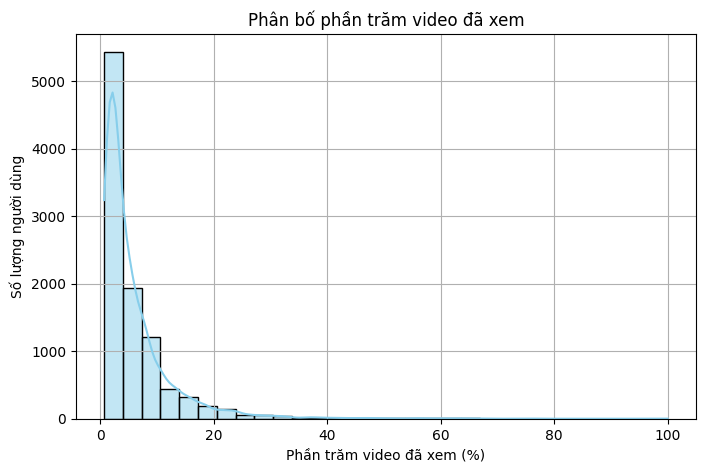

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


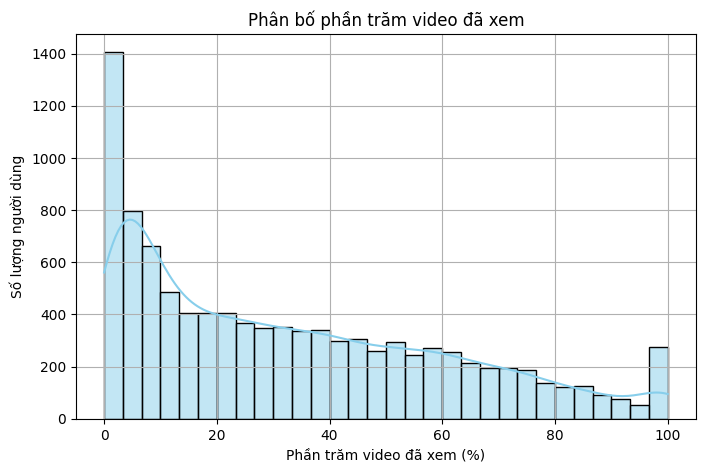

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Chuyển sang pandas
df_grouped_phase1_1 = df_grouped_phase1.select(["video_watched_percentage_2"]).to_pandas()
df_grouped_phase1_2 = df_grouped_phase1.select(["video_percentage_watch_time_2"]).to_pandas()

# Vẽ histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_grouped_phase1_1["video_watched_percentage_2"], bins=30, kde=True, color='skyblue')
plt.title("Phân bố phần trăm video đã xem")
plt.xlabel("Phần trăm video đã xem (%)")
plt.ylabel("Số lượng người dùng")
plt.grid(True)
plt.show()

# Vẽ histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_grouped_phase1_2["video_percentage_watch_time_2"], bins=30, kde=True, color='skyblue')
plt.title("Phân bố phần trăm video đã xem")
plt.xlabel("Phần trăm video đã xem (%)")
plt.ylabel("Số lượng người dùng")
plt.grid(True)
plt.show()


In [26]:
# tính số lần ngắt quãng (pause) mà user đã có trong phase 1
df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.col("start_points")
      .map_elements(lambda list_of_lists: sum(len(sublist) for sublist in list_of_lists), return_dtype=pl.Int64)
      .alias("video_pause_count_2")
])

# tính trung bình số lần ngắt quãng đợt 1 là cột video_pause_avg_1, 
# tính độ lệch chuẩn số lần ngắt quãng đợt 1 là cột video_pause_std_1,
df_grouped_phase1 = df_grouped_phase1.with_columns([
    # Trung bình số lần ngắt quãng mỗi video
    pl.col("start_points")
      .map_elements(lambda list_of_lists: (
          sum(len(sublist) for sublist in list_of_lists) / len(list_of_lists)
          if len(list_of_lists) > 0 else 0
      ), return_dtype=pl.Float64)
      .alias("video_pause_avg_2"),

    # Độ lệch chuẩn số lần ngắt quãng mỗi video, thay null bằng 0.0
    pl.col("start_points")
      .map_elements(lambda list_of_lists: (
          float(pl.Series([len(sublist) for sublist in list_of_lists]).std())
          if len(list_of_lists) > 1 else 0.0  # ít nhất phải có 2 video mới tính std được
      ), return_dtype=pl.Float64)
      .alias("video_pause_std_2"),
])

df_grouped_phase1.head()

user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_watch_time_2,video_time_2,video_percentage_watch_2,video_pause_count_2,video_pause_avg_2,video_pause_std_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64,f64,f64,i64,f64,f64
"""U_34477524""","""936971""","[""ED5B3F2ADA787E189C33DC5901307461""]","[""2020-10-08 18:11:42""]",[599.96],"[[""2020-10-24 11:47:21""]]",[[11.1]],"[[{11.1,1603540041,1.0,0.0}]]",[[0.0]],[[11.1]],[[1.0]],[[11.1]],1,"""936971""",38,2.631579,11.1,599.96,1.850123,1,1.0,0.0
"""U_34577862""","""936971""","[""9953FE1F9A81FF089C33DC5901307461"", ""974DAC1C913C49609C33DC5901307461"", … ""57E7746B406360DB9C33DC5901307461""]","[""2020-10-09 18:25:30"", ""2020-10-09 18:25:30"", … ""2020-10-09 18:25:30""]","[719.64, 621.4, … 595.56]","[[""2020-10-25 07:50:31""], [""2020-10-25 07:52:28"", ""2020-10-25 07:54:08"", ""2020-10-25 07:56:28""], … [""2020-10-25 09:09:10""]]","[[93.058494], [198.028029, 279.007436, 146.101334], … [79.502904]]","[[{728.004,1603612231,2.0,634.945506}], [{202.367528,1603612348,1.0,4.339499}, {482.380597,1603612448,2.0,203.373161}, {629.487,1603612588,2.0,483.385666}], … [{585.366221,1603616950,2.0,505.863317}]]","[[634.945506], [4.339499, 203.373161, 483.385666], … [505.863317]]","[[728.004], [202.367528, 482.380597, 629.487], … [585.366221]]","[[2.0], [1.0, 2.0, 2.0], … [2.0]]","[[46.529247], [198.028029, 139.503718, 73.050667], … [39.751452]]",5,"""936971""",38,13.157895,2285.279106,3284.44,69.578957,8,1.6,0.894427
"""U_7913688""","""697791""","[""FCF9823E664DDFAE9C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461"", … ""99BCE3B9C428CD9F9C33DC5901307461""]","[""2020-02-18 10:01:52"", ""2020-02-18 10:01:52"", … ""2020-02-18 10:01:52""]","[345.64, 701.04, … 402.2]","[[""2020-03-05 09:51:11""], [""2020-03-05 09:56:42"", ""2020-03-05 10:00:49""], … [""2020-03-05 10:09:32"", ""2020-03-05 10:11:07""]]","[[75.2], [52.6, 52.6], … [45.1, 142.4]]","[[{187.7,1583401871,1.5,112.5}], [{204.3,1583402202,1.5,151.7}, {355.2,1583402449,1.5,302.6}], … [{64.2,1583402972,1.5,19.1}, {304.3,1583403067,1.5,161.9}]]","[[112.5], [151.7, 302.6], … [19.1, 161.9]]","[[187.7], [204.3, 355.2], … [64.2, 304.3]]","[[1.5], [1.5, 1.5], … [1.5, 1.5]]","[[50.133333], [35.066667, 35.066667], … [30.066667, 94.933333]]",4,"""697791""",114,3.508772,476.0,1684.28,28.261334,7,1.75,0.5
"""U_28988103""","""697791""","[""A600D54CB3523B979C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461""]","[""2020-03-24 18:04:14"", ""2020-03-24 18:04:14""]","[735.24, 701.04]","[[""2020-04-09 15:30:31"", ""2020-04-09 15:31:26"", ""2020-04-09 15:32:10""], [""2020-04-11 00:43:12""]]","[[54.55, 12.45, 74.95], [45.0]]","[[{60.95,1586446231,1.0,6.4}, {53.05,1586446286,1.25,40.6}, {170.35,1586446330,1.25,95.4}], [{171.7,1586565792,1.5,126.7}]]","[[6.4, 40.6, 95.4], [126.7]]","[[60.95, 53.05, 170.35], [171.7]]","[[1.0, 1.25, 1.25], [1.5]]","[[54.55, 9.96, 59.96], [30.0]]",2,"""697791""",114,1.754386,186.95,1436.28,13.016264,4,2.0,1.414214
"""U_13120959""","""697791""","[""4EF5AA03B5CF21679C33DC5901307461"", ""473F8CE6299749129C33DC5901307461"", … ""D8CA29306C93E6E69C33DC5901307461""]","[""2020-02-21 14:02:47"", ""2020-02-21 14:02:47"", … ""2020-02-21 14:02:47""]","[291.88, 668.52, … 644.8]","[[""2020-03-20 06:04:45"", ""2020-03-20 06:06:15""], [""2020-03-20 06:14:25"", ""2020-03-20 06:14:50"", … ""2020-03-20 06:18:45""], … [""2020-03-20 07:20:09"", ""2020-03-20 07:21:54"", … ""2020-03-20 07:30:15""]]","[[7.5, 7.5], [7.5, 7.5, … 7.5], … [5.0, 5.0, … 5.0]]","[[{35.5,1584684285,1.5,28.0}, {170.5,1584684375,1.5,163.0}], [{34.5,1584684865,1.5,27.0}, {72.5,1584684890,1.5,65.0}, … {424.5,1584685125,1.5,417.0}], … [{9.678,1584688809,1.0,4.678}, {114.

In [27]:
# TÍNH TRUNG BÌNH, STD SỐ LẦN XEM LẠI
def rewatch_counts(start_lists, end_lists):
    counts = []
    for starts, ends in zip(start_lists, end_lists):
        count = 0
        for i in range(1, len(starts)):
            if starts[i] < ends[i - 1]:
                count += 1
        counts.append(count)
    return counts

df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.struct(["start_points", "end_points"])
      .map_elements(lambda x: rewatch_counts(x["start_points"], x["end_points"]))
      .alias("video_rewatch_count_2")
])

df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.col("video_rewatch_count_2")
      .list.eval(pl.element().mean())
      .list.first()
      .alias("video_rewatch_avg_2"),

    pl.col("video_rewatch_count_2")
      .list.eval(pl.element().std(ddof=1))
      .list.first()
      .fill_null(0.0)
      .alias("video_rewatch_std_2"),
])


df_grouped_phase1.head()

/tmp/ipykernel_31/1946632034.py:12: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_grouped_phase1 = df_grouped_phase1.with_columns([


user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_watch_time_2,video_time_2,video_percentage_watch_2,video_pause_count_2,video_pause_avg_2,video_pause_std_2,video_rewatch_count_2,video_rewatch_avg_2,video_rewatch_std_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64,f64,f64,i64,f64,f64,list[i64],f64,f64
"""U_34477524""","""936971""","[""ED5B3F2ADA787E189C33DC5901307461""]","[""2020-10-08 18:11:42""]",[599.96],"[[""2020-10-24 11:47:21""]]",[[11.1]],"[[{11.1,1603540041,1.0,0.0}]]",[[0.0]],[[11.1]],[[1.0]],[[11.1]],1,"""936971""",38,2.631579,11.1,599.96,1.850123,1,1.0,0.0,[0],0.0,0.0
"""U_34577862""","""936971""","[""9953FE1F9A81FF089C33DC5901307461"", ""974DAC1C913C49609C33DC5901307461"", … ""57E7746B406360DB9C33DC5901307461""]","[""2020-10-09 18:25:30"", ""2020-10-09 18:25:30"", … ""2020-10-09 18:25:30""]","[719.64, 621.4, … 595.56]","[[""2020-10-25 07:50:31""], [""2020-10-25 07:52:28"", ""2020-10-25 07:54:08"", ""2020-10-25 07:56:28""], … [""2020-10-25 09:09:10""]]","[[93.058494], [198.028029, 279.007436, 146.101334], … [79.502904]]","[[{728.004,1603612231,2.0,634.945506}], [{202.367528,1603612348,1.0,4.339499}, {482.380597,1603612448,2.0,203.373161}, {629.487,1603612588,2.0,483.385666}], … [{585.366221,1603616950,2.0,505.863317}]]","[[634.945506], [4.339499, 203.373161, 483.385666], … [505.863317]]","[[728.004], [202.367528, 482.380597, 629.487], … [585.366221]]","[[2.0], [1.0, 2.0, 2.0], … [2.0]]","[[46.529247], [198.028029, 139.503718, 73.050667], … [39.751452]]",5,"""936971""",38,13.157895,2285.279106,3284.44,69.578957,8,1.6,0.894427,"[0, 0, … 0]",0.2,0.447214
"""U_7913688""","""697791""","[""FCF9823E664DDFAE9C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461"", … ""99BCE3B9C428CD9F9C33DC5901307461""]","[""2020-02-18 10:01:52"", ""2020-02-18 10:01:52"", … ""2020-02-18 10:01:52""]","[345.64, 701.04, … 402.2]","[[""2020-03-05 09:51:11""], [""2020-03-05 09:56:42"", ""2020-03-05 10:00:49""], … [""2020-03-05 10:09:32"", ""2020-03-05 10:11:07""]]","[[75.2], [52.6, 52.6], … [45.1, 142.4]]","[[{187.7,1583401871,1.5,112.5}], [{204.3,1583402202,1.5,151.7}, {355.2,1583402449,1.5,302.6}], … [{64.2,1583402972,1.5,19.1}, {304.3,1583403067,1.5,161.9}]]","[[112.5], [151.7, 302.6], … [19.1, 161.9]]","[[187.7], [204.3, 355.2], … [64.2, 304.3]]","[[1.5], [1.5, 1.5], … [1.5, 1.5]]","[[50.133333], [35.066667, 35.066667], … [30.066667, 94.933333]]",4,"""697791""",114,3.508772,476.0,1684.28,28.261334,7,1.75,0.5,"[0, 0, … 0]",0.0,0.0
"""U_28988103""","""697791""","[""A600D54CB3523B979C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461""]","[""2020-03-24 18:04:14"", ""2020-03-24 18:04:14""]","[735.24, 701.04]","[[""2020-04-09 15:30:31"", ""2020-04-09 15:31:26"", ""2020-04-09 15:32:10""], [""2020-04-11 00:43:12""]]","[[54.55, 12.45, 74.95], [45.0]]","[[{60.95,1586446231,1.0,6.4}, {53.05,1586446286,1.25,40.6}, {170.35,1586446330,1.25,95.4}], [{171.7,1586565792,1.5,126.7}]]","[[6.4, 40.6, 95.4], [126.7]]","[[60.95, 53.05, 170.35], [171.7]]","[[1.0, 1.25, 1.25], [1.5]]","[[54.55, 9.96, 59.96], [30.0]]",2,"""697791""",114,1.754386,186.95,1436.28,13.016264,4,2.0,1.414214,"[1, 0]",0.5,0.707107
"""U_13120959""","""697791""","[""4EF5AA03B5CF21679C33DC5901307461"", ""473F8CE6299749129C33DC5901307461"", … ""D8CA29306C93E6E69C33DC5901307461""]","[""2020-02-21 14:02:47"", ""2020-02-21 14:02:47"", … ""2020-02-21 14:02:47""]","[291.88, 668.52, … 644.8]","[[""2020-03-20 06:04:45"", ""2020-03-20 06:06:15""], [""2020-03-20 06:14:25"", ""2020-03-20 06:14:50"", … ""2020-03-20 06:18:45""], … [""2020-03-20 07:20:09"", ""2020-03-20 07:21:54"", … ""2020-03-20 07:30:15""]]","[[7.5, 7.5], [7.5, 7.5, … 7.5], … [5.0, 5.0, … 5.0]]","[[{35.5,1584684285,1.5,28.

In [28]:
df_grouped_phase1.head()

user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_watch_time_2,video_time_2,video_percentage_watch_2,video_pause_count_2,video_pause_avg_2,video_pause_std_2,video_rewatch_count_2,video_rewatch_avg_2,video_rewatch_std_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64,f64,f64,i64,f64,f64,list[i64],f64,f64
"""U_34477524""","""936971""","[""ED5B3F2ADA787E189C33DC5901307461""]","[""2020-10-08 18:11:42""]",[599.96],"[[""2020-10-24 11:47:21""]]",[[11.1]],"[[{11.1,1603540041,1.0,0.0}]]",[[0.0]],[[11.1]],[[1.0]],[[11.1]],1,"""936971""",38,2.631579,11.1,599.96,1.850123,1,1.0,0.0,[0],0.0,0.0
"""U_34577862""","""936971""","[""9953FE1F9A81FF089C33DC5901307461"", ""974DAC1C913C49609C33DC5901307461"", … ""57E7746B406360DB9C33DC5901307461""]","[""2020-10-09 18:25:30"", ""2020-10-09 18:25:30"", … ""2020-10-09 18:25:30""]","[719.64, 621.4, … 595.56]","[[""2020-10-25 07:50:31""], [""2020-10-25 07:52:28"", ""2020-10-25 07:54:08"", ""2020-10-25 07:56:28""], … [""2020-10-25 09:09:10""]]","[[93.058494], [198.028029, 279.007436, 146.101334], … [79.502904]]","[[{728.004,1603612231,2.0,634.945506}], [{202.367528,1603612348,1.0,4.339499}, {482.380597,1603612448,2.0,203.373161}, {629.487,1603612588,2.0,483.385666}], … [{585.366221,1603616950,2.0,505.863317}]]","[[634.945506], [4.339499, 203.373161, 483.385666], … [505.863317]]","[[728.004], [202.367528, 482.380597, 629.487], … [585.366221]]","[[2.0], [1.0, 2.0, 2.0], … [2.0]]","[[46.529247], [198.028029, 139.503718, 73.050667], … [39.751452]]",5,"""936971""",38,13.157895,2285.279106,3284.44,69.578957,8,1.6,0.894427,"[0, 0, … 0]",0.2,0.447214
"""U_7913688""","""697791""","[""FCF9823E664DDFAE9C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461"", … ""99BCE3B9C428CD9F9C33DC5901307461""]","[""2020-02-18 10:01:52"", ""2020-02-18 10:01:52"", … ""2020-02-18 10:01:52""]","[345.64, 701.04, … 402.2]","[[""2020-03-05 09:51:11""], [""2020-03-05 09:56:42"", ""2020-03-05 10:00:49""], … [""2020-03-05 10:09:32"", ""2020-03-05 10:11:07""]]","[[75.2], [52.6, 52.6], … [45.1, 142.4]]","[[{187.7,1583401871,1.5,112.5}], [{204.3,1583402202,1.5,151.7}, {355.2,1583402449,1.5,302.6}], … [{64.2,1583402972,1.5,19.1}, {304.3,1583403067,1.5,161.9}]]","[[112.5], [151.7, 302.6], … [19.1, 161.9]]","[[187.7], [204.3, 355.2], … [64.2, 304.3]]","[[1.5], [1.5, 1.5], … [1.5, 1.5]]","[[50.133333], [35.066667, 35.066667], … [30.066667, 94.933333]]",4,"""697791""",114,3.508772,476.0,1684.28,28.261334,7,1.75,0.5,"[0, 0, … 0]",0.0,0.0
"""U_28988103""","""697791""","[""A600D54CB3523B979C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461""]","[""2020-03-24 18:04:14"", ""2020-03-24 18:04:14""]","[735.24, 701.04]","[[""2020-04-09 15:30:31"", ""2020-04-09 15:31:26"", ""2020-04-09 15:32:10""], [""2020-04-11 00:43:12""]]","[[54.55, 12.45, 74.95], [45.0]]","[[{60.95,1586446231,1.0,6.4}, {53.05,1586446286,1.25,40.6}, {170.35,1586446330,1.25,95.4}], [{171.7,1586565792,1.5,126.7}]]","[[6.4, 40.6, 95.4], [126.7]]","[[60.95, 53.05, 170.35], [171.7]]","[[1.0, 1.25, 1.25], [1.5]]","[[54.55, 9.96, 59.96], [30.0]]",2,"""697791""",114,1.754386,186.95,1436.28,13.016264,4,2.0,1.414214,"[1, 0]",0.5,0.707107
"""U_13120959""","""697791""","[""4EF5AA03B5CF21679C33DC5901307461"", ""473F8CE6299749129C33DC5901307461"", … ""D8CA29306C93E6E69C33DC5901307461""]","[""2020-02-21 14:02:47"", ""2020-02-21 14:02:47"", … ""2020-02-21 14:02:47""]","[291.88, 668.52, … 644.8]","[[""2020-03-20 06:04:45"", ""2020-03-20 06:06:15""], [""2020-03-20 06:14:25"", ""2020-03-20 06:14:50"", … ""2020-03-20 06:18:45""], … [""2020-03-20 07:20:09"", ""2020-03-20 07:21:54"", … ""2020-03-20 07:30:15""]]","[[7.5, 7.5], [7.5, 7.5, … 7.5], … [5.0, 5.0, … 5.0]]","[[{35.5,1584684285,1.5,28.

In [29]:
# TÍNH THỜI GIAN NGẮT QUÃNG GIỮA CÁC LẦN XEM, TRUNG BÌNH VÀ STD
#
df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.struct(["start_points", "end_points"]).map_elements(
        lambda row: [
            [s_next - e_curr for s_next, e_curr in zip(s[1:], e[:-1])] if len(s) > 1 else [0.0]
            for s, e in zip(row["start_points"], row["end_points"])
        ]
    ).alias("video_time_between_views_2")
])

df_grouped_phase1 = df_grouped_phase1.with_columns([
    # Tính trung bình
    pl.col("video_time_between_views_2").map_elements(
        lambda outer: float(sum([sum(inner) for inner in outer], 0.0)) / max(sum([len(inner) for inner in outer]), 1)
    ).alias("video_time_between_views_avg_2"),

    # Tính độ lệch chuẩn
    pl.col("video_time_between_views_2").map_elements(
        lambda outer: (
            (lambda flat: float(np.std(flat, ddof=1)) if len(flat) > 1 else 0.0)(
                [x for inner in outer for x in inner]
            )
        )
    ).alias("video_time_between_views_std_2")
])

df_grouped_phase1.head()

/tmp/ipykernel_31/257186670.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_grouped_phase1 = df_grouped_phase1.with_columns([
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
sys:1: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.


user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_watch_time_2,video_time_2,video_percentage_watch_2,video_pause_count_2,video_pause_avg_2,video_pause_std_2,video_rewatch_count_2,video_rewatch_avg_2,video_rewatch_std_2,video_time_between_views_2,video_time_between_views_avg_2,video_time_between_views_std_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64,f64,f64,i64,f64,f64,list[i64],f64,f64,list[list[f64]],f64,f64
"""U_34477524""","""936971""","[""ED5B3F2ADA787E189C33DC5901307461""]","[""2020-10-08 18:11:42""]",[599.96],"[[""2020-10-24 11:47:21""]]",[[11.1]],"[[{11.1,1603540041,1.0,0.0}]]",[[0.0]],[[11.1]],[[1.0]],[[11.1]],1,"""936971""",38,2.631579,11.1,599.96,1.850123,1,1.0,0.0,[0],0.0,0.0,[[0.0]],0.0,0.0
"""U_34577862""","""936971""","[""9953FE1F9A81FF089C33DC5901307461"", ""974DAC1C913C49609C33DC5901307461"", … ""57E7746B406360DB9C33DC5901307461""]","[""2020-10-09 18:25:30"", ""2020-10-09 18:25:30"", … ""2020-10-09 18:25:30""]","[719.64, 621.4, … 595.56]","[[""2020-10-25 07:50:31""], [""2020-10-25 07:52:28"", ""2020-10-25 07:54:08"", ""2020-10-25 07:56:28""], … [""2020-10-25 09:09:10""]]","[[93.058494], [198.028029, 279.007436, 146.101334], … [79.502904]]","[[{728.004,1603612231,2.0,634.945506}], [{202.367528,1603612348,1.0,4.339499}, {482.380597,1603612448,2.0,203.373161}, {629.487,1603612588,2.0,483.385666}], … [{585.366221,1603616950,2.0,505.863317}]]","[[634.945506], [4.339499, 203.373161, 483.385666], … [505.863317]]","[[728.004], [202.367528, 482.380597, 629.487], … [585.366221]]","[[2.0], [1.0, 2.0, 2.0], … [2.0]]","[[46.529247], [198.028029, 139.503718, 73.050667], … [39.751452]]",5,"""936971""",38,13.157895,2285.279106,3284.44,69.578957,8,1.6,0.894427,"[0, 0, … 0]",0.2,0.447214,"[[0.0], [1.005633, 1.005069], … [0.0]]",-103.613999,254.786943
"""U_7913688""","""697791""","[""FCF9823E664DDFAE9C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461"", … ""99BCE3B9C428CD9F9C33DC5901307461""]","[""2020-02-18 10:01:52"", ""2020-02-18 10:01:52"", … ""2020-02-18 10:01:52""]","[345.64, 701.04, … 402.2]","[[""2020-03-05 09:51:11""], [""2020-03-05 09:56:42"", ""2020-03-05 10:00:49""], … [""2020-03-05 10:09:32"", ""2020-03-05 10:11:07""]]","[[75.2], [52.6, 52.6], … [45.1, 142.4]]","[[{187.7,1583401871,1.5,112.5}], [{204.3,1583402202,1.5,151.7}, {355.2,1583402449,1.5,302.6}], … [{64.2,1583402972,1.5,19.1}, {304.3,1583403067,1.5,161.9}]]","[[112.5], [151.7, 302.6], … [19.1, 161.9]]","[[187.7], [204.3, 355.2], … [64.2, 304.3]]","[[1.5], [1.5, 1.5], … [1.5, 1.5]]","[[50.133333], [35.066667, 35.066667], … [30.066667, 94.933333]]",4,"""697791""",114,3.508772,476.0,1684.28,28.261334,7,1.75,0.5,"[0, 0, … 0]",0.0,0.0,"[[0.0], [98.3], … [97.7]]",71.475,47.803373
"""U_28988103""","""697791""","[""A600D54CB3523B979C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461""]","[""2020-03-24 18:04:14"", ""2020-03-24 18:04:14""]","[735.24, 701.04]","[[""2020-04-09 15:30:31"", ""2020-04-09 15:31:26"", ""2020-04-09 15:32:10""], [""2020-04-11 00:43:12""]]","[[54.55, 12.45, 74.95], [45.0]]","[[{60.95,1586446231,1.0,6.4}, {53.05,1586446286,1.25,40.6}, {170.35,1586446330,1.25,95.4}], [{171.7,1586565792,1.5,126.7}]]","[[6.4, 40.6, 95.4], [126.7]]","[[60.95, 53.05, 170.35], [171.7]]","[[1.0, 1.25, 1.25], [1.5]]","[[54.55, 9.96, 59.96], [30.0]]",2,"""697791""",114,1.754386,186.95,1436.28,13.016264,4,2.0,1.414214,"[1, 0]",0.5,0.707107,"[[-20.35, 42.35], [0.0]]",7.333333,31.986807
"""U_13120959""","""697791""","[""4EF5AA03B5CF21679C33DC5901307461"", ""473F8CE6299749129C33DC5901307461"", … ""D8CA29306C93E6E69C33DC5901307461""]","[""2020-02-21 14:02:47"", ""2020-02-21 14:02:47"", … ""2020-02-21 14:02:47""]","[291.88, 668.52, … 644.8]","[[""2020-03-

In [30]:
# TÍNH TRUNG BÌNH TỐC ĐỘ XEM

df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.col("speed").map_elements(
        lambda outer: float(
            sum([sum(inner) / len(inner) if len(inner) > 0 else 0.0 for inner in outer])
        ) / max(len(outer), 1)
    ).alias("video_speed_avg_2")
])

df_grouped_phase1.head()

/tmp/ipykernel_31/939207987.py:3: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_grouped_phase1 = df_grouped_phase1.with_columns([


user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_watch_time_2,video_time_2,video_percentage_watch_2,video_pause_count_2,video_pause_avg_2,video_pause_std_2,video_rewatch_count_2,video_rewatch_avg_2,video_rewatch_std_2,video_time_between_views_2,video_time_between_views_avg_2,video_time_between_views_std_2,video_speed_avg_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64,f64,f64,i64,f64,f64,list[i64],f64,f64,list[list[f64]],f64,f64,f64
"""U_34477524""","""936971""","[""ED5B3F2ADA787E189C33DC5901307461""]","[""2020-10-08 18:11:42""]",[599.96],"[[""2020-10-24 11:47:21""]]",[[11.1]],"[[{11.1,1603540041,1.0,0.0}]]",[[0.0]],[[11.1]],[[1.0]],[[11.1]],1,"""936971""",38,2.631579,11.1,599.96,1.850123,1,1.0,0.0,[0],0.0,0.0,[[0.0]],0.0,0.0,1.0
"""U_34577862""","""936971""","[""9953FE1F9A81FF089C33DC5901307461"", ""974DAC1C913C49609C33DC5901307461"", … ""57E7746B406360DB9C33DC5901307461""]","[""2020-10-09 18:25:30"", ""2020-10-09 18:25:30"", … ""2020-10-09 18:25:30""]","[719.64, 621.4, … 595.56]","[[""2020-10-25 07:50:31""], [""2020-10-25 07:52:28"", ""2020-10-25 07:54:08"", ""2020-10-25 07:56:28""], … [""2020-10-25 09:09:10""]]","[[93.058494], [198.028029, 279.007436, 146.101334], … [79.502904]]","[[{728.004,1603612231,2.0,634.945506}], [{202.367528,1603612348,1.0,4.339499}, {482.380597,1603612448,2.0,203.373161}, {629.487,1603612588,2.0,483.385666}], … [{585.366221,1603616950,2.0,505.863317}]]","[[634.945506], [4.339499, 203.373161, 483.385666], … [505.863317]]","[[728.004], [202.367528, 482.380597, 629.487], … [585.366221]]","[[2.0], [1.0, 2.0, 2.0], … [2.0]]","[[46.529247], [198.028029, 139.503718, 73.050667], … [39.751452]]",5,"""936971""",38,13.157895,2285.279106,3284.44,69.578957,8,1.6,0.894427,"[0, 0, … 0]",0.2,0.447214,"[[0.0], [1.005633, 1.005069], … [0.0]]",-103.613999,254.786943,1.933333
"""U_7913688""","""697791""","[""FCF9823E664DDFAE9C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461"", … ""99BCE3B9C428CD9F9C33DC5901307461""]","[""2020-02-18 10:01:52"", ""2020-02-18 10:01:52"", … ""2020-02-18 10:01:52""]","[345.64, 701.04, … 402.2]","[[""2020-03-05 09:51:11""], [""2020-03-05 09:56:42"", ""2020-03-05 10:00:49""], … [""2020-03-05 10:09:32"", ""2020-03-05 10:11:07""]]","[[75.2], [52.6, 52.6], … [45.1, 142.4]]","[[{187.7,1583401871,1.5,112.5}], [{204.3,1583402202,1.5,151.7}, {355.2,1583402449,1.5,302.6}], … [{64.2,1583402972,1.5,19.1}, {304.3,1583403067,1.5,161.9}]]","[[112.5], [151.7, 302.6], … [19.1, 161.9]]","[[187.7], [204.3, 355.2], … [64.2, 304.3]]","[[1.5], [1.5, 1.5], … [1.5, 1.5]]","[[50.133333], [35.066667, 35.066667], … [30.066667, 94.933333]]",4,"""697791""",114,3.508772,476.0,1684.28,28.261334,7,1.75,0.5,"[0, 0, … 0]",0.0,0.0,"[[0.0], [98.3], … [97.7]]",71.475,47.803373,1.5
"""U_28988103""","""697791""","[""A600D54CB3523B979C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461""]","[""2020-03-24 18:04:14"", ""2020-03-24 18:04:14""]","[735.24, 701.04]","[[""2020-04-09 15:30:31"", ""2020-04-09 15:31:26"", ""2020-04-09 15:32:10""], [""2020-04-11 00:43:12""]]","[[54.55, 12.45, 74.95], [45.0]]","[[{60.95,1586446231,1.0,6.4}, {53.05,1586446286,1.25,40.6}, {170.35,1586446330,1.25,95.4}], [{171.7,1586565792,1.5,126.7}]]","[[6.4, 40.6, 95.4], [126.7]]","[[60.95, 53.05, 170.35], [171.7]]","[[1.0, 1.25, 1.25], [1.5]]","[[54.55, 9.96, 59.96], [30.0]]",2,"""697791""",114,1.754386,186.95,1436.28,13.016264,4,2.0,1.414214,"[1, 0]",0.5,0.707107,"[[-20.35, 42.35], [0.0]]",7.333333,31.986807,1.333333
"""U_13120959""","""697791""","[""4EF5AA03B5CF21679C33DC5901307461"", ""473F8CE6299749129C33DC5901307461"", … ""D8CA29306C93E6E69C33DC5901307461""]","[""2020-02-21 14:02:47"", ""2020-02-21 14:02:47"", … ""2020-02-21 14:02:

In [31]:
# TÍNH ENTROPY CỦA KHOẢNG THỜI GIAN XEM

def entropy_single(duration_list):
    total = sum(duration_list)
    if total == 0 or len(duration_list) == 0:
        return 0.0
    probs = [d / total for d in duration_list]
    return sum([-p * np.log2(p) if p > 0 else 0.0 for p in probs])

# Áp dụng cho từng video trong danh sách duration_seg
df_grouped_phase1 = df_grouped_phase1.with_columns([
    pl.col("duration_seg").map_elements(
        lambda video_durations: [entropy_single(seg) for seg in video_durations]
    ).alias("ent_seg")  # đây là entropy của từng video
])

# Tính trung bình tất cả entropy từ các list trong ent_seg và thêm làm cột entropy_time_1
# Tính trung bình của các list trong ent_seg
df_grouped_phase1 = df_grouped_phase1.with_columns(
    pl.col("ent_seg").list.mean().alias("entropy_time_2")
)

df_grouped_phase1.head()

/tmp/ipykernel_31/1325227788.py:11: MapWithoutReturnDtypeWarning: Calling `map_elements` without specifying `return_dtype` can lead to unpredictable results. Specify `return_dtype` to silence this warning.
  df_grouped_phase1 = df_grouped_phase1.with_columns([


user_id,course_of_watched_video,ccid,enroll_time,video_length,local_start_time,duration_seg,segments_list,start_points,end_points,speed,watch_time_seg,video_watch_count_2,unique_course,total_videos_for_user,video_watched_percentage_2,video_watch_time_2,video_time_2,video_percentage_watch_2,video_pause_count_2,video_pause_avg_2,video_pause_std_2,video_rewatch_count_2,video_rewatch_avg_2,video_rewatch_std_2,video_time_between_views_2,video_time_between_views_avg_2,video_time_between_views_std_2,video_speed_avg_2,ent_seg,entropy_time_2
str,str,list[str],list[str],list[f64],list[list[str]],list[list[f64]],list[list[struct[4]]],list[list[f64]],list[list[f64]],list[list[f64]],list[list[f64]],u32,str,i64,f64,f64,f64,f64,i64,f64,f64,list[i64],f64,f64,list[list[f64]],f64,f64,f64,list[f64],f64
"""U_34477524""","""936971""","[""ED5B3F2ADA787E189C33DC5901307461""]","[""2020-10-08 18:11:42""]",[599.96],"[[""2020-10-24 11:47:21""]]",[[11.1]],"[[{11.1,1603540041,1.0,0.0}]]",[[0.0]],[[11.1]],[[1.0]],[[11.1]],1,"""936971""",38,2.631579,11.1,599.96,1.850123,1,1.0,0.0,[0],0.0,0.0,[[0.0]],0.0,0.0,1.0,[0.0],0.0
"""U_34577862""","""936971""","[""9953FE1F9A81FF089C33DC5901307461"", ""974DAC1C913C49609C33DC5901307461"", … ""57E7746B406360DB9C33DC5901307461""]","[""2020-10-09 18:25:30"", ""2020-10-09 18:25:30"", … ""2020-10-09 18:25:30""]","[719.64, 621.4, … 595.56]","[[""2020-10-25 07:50:31""], [""2020-10-25 07:52:28"", ""2020-10-25 07:54:08"", ""2020-10-25 07:56:28""], … [""2020-10-25 09:09:10""]]","[[93.058494], [198.028029, 279.007436, 146.101334], … [79.502904]]","[[{728.004,1603612231,2.0,634.945506}], [{202.367528,1603612348,1.0,4.339499}, {482.380597,1603612448,2.0,203.373161}, {629.487,1603612588,2.0,483.385666}], … [{585.366221,1603616950,2.0,505.863317}]]","[[634.945506], [4.339499, 203.373161, 483.385666], … [505.863317]]","[[728.004], [202.367528, 482.380597, 629.487], … [585.366221]]","[[2.0], [1.0, 2.0, 2.0], … [2.0]]","[[46.529247], [198.028029, 139.503718, 73.050667], … [39.751452]]",5,"""936971""",38,13.157895,2285.279106,3284.44,69.578957,8,1.6,0.894427,"[0, 0, … 0]",0.2,0.447214,"[[0.0], [1.005633, 1.005069], … [0.0]]",-103.613999,254.786943,1.933333,"[0.0, 1.535256, … 0.0]",0.50705
"""U_7913688""","""697791""","[""FCF9823E664DDFAE9C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461"", … ""99BCE3B9C428CD9F9C33DC5901307461""]","[""2020-02-18 10:01:52"", ""2020-02-18 10:01:52"", … ""2020-02-18 10:01:52""]","[345.64, 701.04, … 402.2]","[[""2020-03-05 09:51:11""], [""2020-03-05 09:56:42"", ""2020-03-05 10:00:49""], … [""2020-03-05 10:09:32"", ""2020-03-05 10:11:07""]]","[[75.2], [52.6, 52.6], … [45.1, 142.4]]","[[{187.7,1583401871,1.5,112.5}], [{204.3,1583402202,1.5,151.7}, {355.2,1583402449,1.5,302.6}], … [{64.2,1583402972,1.5,19.1}, {304.3,1583403067,1.5,161.9}]]","[[112.5], [151.7, 302.6], … [19.1, 161.9]]","[[187.7], [204.3, 355.2], … [64.2, 304.3]]","[[1.5], [1.5, 1.5], … [1.5, 1.5]]","[[50.133333], [35.066667, 35.066667], … [30.066667, 94.933333]]",4,"""697791""",114,3.508772,476.0,1684.28,28.261334,7,1.75,0.5,"[0, 0, … 0]",0.0,0.0,"[[0.0], [98.3], … [97.7]]",71.475,47.803373,1.5,"[0.0, 1.0, … 0.795926]",0.563196
"""U_28988103""","""697791""","[""A600D54CB3523B979C33DC5901307461"", ""3F0F70E858E41EF99C33DC5901307461""]","[""2020-03-24 18:04:14"", ""2020-03-24 18:04:14""]","[735.24, 701.04]","[[""2020-04-09 15:30:31"", ""2020-04-09 15:31:26"", ""2020-04-09 15:32:10""], [""2020-04-11 00:43:12""]]","[[54.55, 12.45, 74.95], [45.0]]","[[{60.95,1586446231,1.0,6.4}, {53.05,1586446286,1.25,40.6}, {170.35,1586446330,1.25,95.4}], [{171.7,1586565792,1.5,126.7}]]","[[6.4, 40.6, 95.4], [126.7]]","[[60.95, 53.05, 170.35], [171.7]]","[[1.0, 1.25, 1.25], [1.5]]","[[54.55, 9.96, 59.96], [30.0]]",2,"""697791""",114,1.754386,186.95,1436.28,13.016264,4,2.0,1.414214,"[1, 0]",0.5,0.707107,"[[-20.35, 42.35], [0.0]]",7.333333,31.986807,1.333333,"[1.324664, 0.0]",0.662332
"""U_13120959""","""697791""","[""4EF5AA03B5CF21679C33DC5901307461"", ""473F8CE62

In [ ]:
df_grouped_phase1.write_parquet("user_video_phase2.parquet") 
#course_info_limit_df.write_parquet("course_info_limit.parquet") 